In [12]:
import requests
from chave import chave_api
import pandas as pd
from io import StringIO
from  texttable import Texttable
import numpy as np

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=QETH11.SAO&apikey={chave_api}&datatype=csv'
r = requests.get(url)
# print(r.text)

tabela = pd.read_csv(StringIO(r.text))
print(tabela)

     timestamp   open   high    low  close  volume
0   2024-10-30  10.60  10.99  10.60  10.77   42056
1   2024-10-29  10.39  10.77  10.27  10.58  112810
2   2024-10-28  10.09  10.19  10.00  10.05   98956
3   2024-10-25  10.15  10.20   9.85  10.09   41984
4   2024-10-24  10.10  10.18  10.05  10.13   30354
..         ...    ...    ...    ...    ...     ...
95  2024-06-19  13.55  13.90  13.55  13.70   41728
96  2024-06-18  13.38  13.38  13.10  13.16   90347
97  2024-06-17  13.45  13.89  13.42  13.66   72606
98  2024-06-14  13.40  13.68  13.06  13.16   62032
99  2024-06-13  13.67  13.70  13.28  13.32   41019

[100 rows x 6 columns]


In [13]:
'''
linha vermelha = 8 periodos
linha verde = 3 periodos
linha laranja = 20 periodos
'''

'\nlinha vermelha = 8 periodos\nlinha verde = 3 periodos\nlinha laranja = 20 periodos\n'

In [14]:
print(tabela[:8].close)
valores_close = tabela['close'].tolist()
valores_high = tabela['high'].tolist()
valores_low = tabela['low'].tolist()

print(valores_close)

0    10.77
1    10.58
2    10.05
3    10.09
4    10.13
5    10.00
6    10.54
7    10.65
Name: close, dtype: float64
[10.77, 10.58, 10.05, 10.09, 10.13, 10.0, 10.54, 10.65, 10.5, 10.49, 10.45, 10.43, 10.22, 9.69, 9.39, 9.36, 9.46, 9.48, 9.3, 9.09, 9.4, 9.75, 9.94, 10.31, 10.13, 10.0, 10.16, 10.29, 9.75, 9.48, 9.04, 9.22, 9.07, 9.6, 9.41, 9.4, 9.59, 9.27, 9.04, 9.5, 9.84, 9.85, 10.05, 10.0, 10.09, 9.98, 10.1, 10.4, 10.6, 10.33, 10.31, 10.19, 10.0, 10.13, 10.05, 10.44, 10.59, 10.32, 10.25, 10.18, 9.65, 10.2, 10.21, 12.24, 12.7, 13.14, 13.0, 13.24, 13.18, 12.55, 13.4, 13.51, 13.78, 13.97, 13.33, 13.34, 13.29, 13.19, 12.09, 12.15, 12.15, 12.18, 11.87, 12.1, 12.64, 13.2, 13.88, 13.97, 13.53, 13.41, 13.44, 13.26, 12.54, 13.65, 13.67, 13.7, 13.16, 13.66, 13.16, 13.32]


In [15]:
valores_linha_verde = np.zeros((len(tabela)-1)//3)
count_verde = 0
j = 0
for i in range(len(tabela)):
    if(count_verde != 3):
        valores_linha_verde[j] = valores_linha_verde[j] + valores_close[i]
        count_verde+=1
    if(count_verde == 3):
        valores_linha_verde[j] = valores_linha_verde[j] /3.0
        j+=1
        count_verde = 0
        
    if j >= len(valores_linha_verde):  
        break



In [16]:
valores_linha_laranja = np.zeros((len(tabela)-1)//20)
count_laranja = 0
j = 0
for i in range(len(tabela)):
    if(count_laranja != 20):
        valores_linha_laranja[j] = valores_linha_laranja[j] + valores_close[i]
        count_laranja+=1
    if(count_laranja == 20):
        valores_linha_laranja[j] = valores_linha_laranja[j] /20.0
        j+=1
        count_laranja = 0
        
    if j >= len(valores_linha_laranja):  
        break


In [17]:
valores_linha_vermelha = np.zeros((len(tabela)-1)//8)
count_vermelha = 0
j = 0
for i in range(len(tabela)):
    if(count_vermelha != 8):
        valores_linha_vermelha[j] = valores_linha_vermelha[j] + valores_close[i]
        count_vermelha+=1
    if(count_vermelha == 8):
        valores_linha_vermelha[j] = valores_linha_vermelha[j] /8.0
        j+=1
        count_vermelha = 0
        
    if j >= len(valores_linha_vermelha):  
        break


In [18]:
import numpy as np
linha_vermelha = np.mean(tabela[:8].close)
print(linha_vermelha)

10.35125


In [19]:
linha_verde = np.mean(tabela[:3].close)
linha_laranja = np.mean(tabela[:20].close)
print(linha_verde)
print(linha_laranja)

10.466666666666667
10.0335


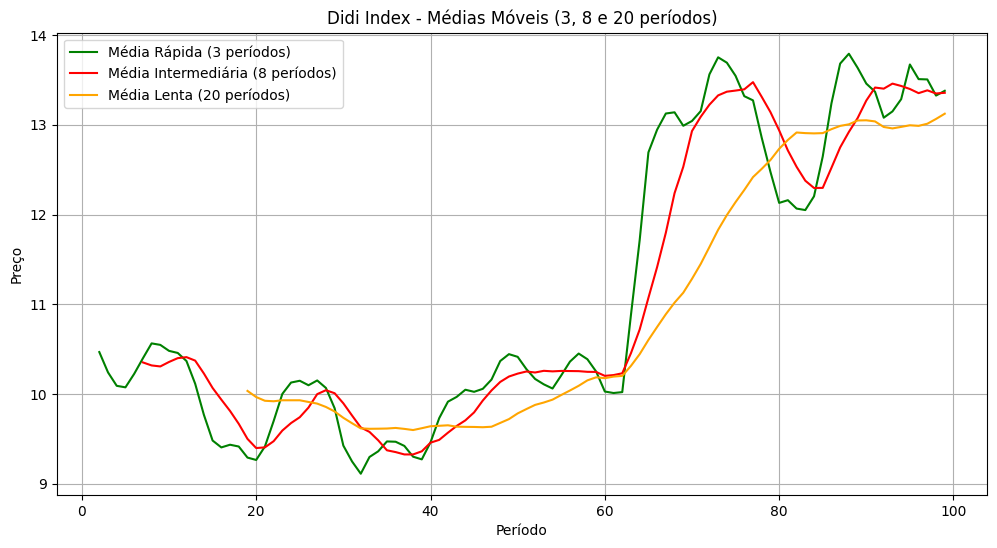

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo de dados de preços (substitua pelos seus valores reais)

# Converte para uma série do Pandas para facilitar o cálculo das médias móveis
serie_precos = pd.Series(valores_close)

# Calcula as médias móveis
media_3 = serie_precos.rolling(window=3).mean()
media_8 = serie_precos.rolling(window=8).mean()
media_20 = serie_precos.rolling(window=20).mean()

# Configura o gráfico
plt.figure(figsize=(12, 6))

# Plota as médias móveis no gráfico, com as cores tradicionais do Didi Index
plt.plot(media_3, color='green', label='Média Rápida (3 períodos)')
plt.plot(media_8, color='red', label='Média Intermediária (8 períodos)')
plt.plot(media_20, color='orange', label='Média Lenta (20 períodos)')

# Configurações adicionais do gráfico
plt.title("Didi Index - Médias Móveis (3, 8 e 20 períodos)")
plt.xlabel("Período")
plt.ylabel("Preço")
plt.grid(True)
plt.legend(loc='upper left')

# Exibe o gráfico
plt.show()


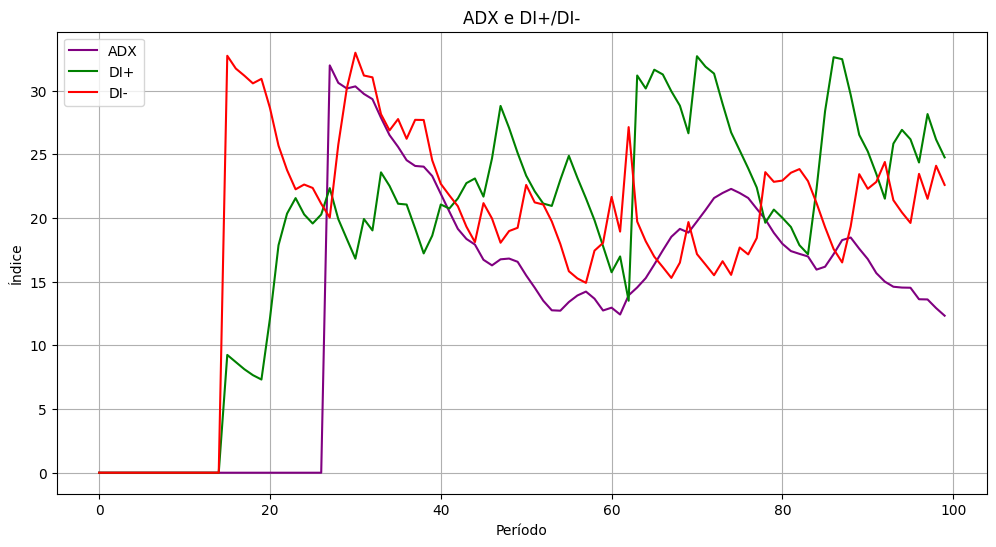

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ta.trend import ADXIndicator


data = pd.DataFrame({
    'close': valores_close,
    'high': valores_high,
    'low': valores_low
})

adx_indicator = ADXIndicator(high=data['high'], low=data['low'], close=data['close'], window=14)

data['ADX'] = adx_indicator.adx()
data['DI+'] = adx_indicator.adx_pos()
data['DI-'] = adx_indicator.adx_neg()

plt.figure(figsize=(12, 6))

plt.plot(data['ADX'], color='purple', label='ADX')
plt.plot(data['DI+'], color='green', label='DI+')
plt.plot(data['DI-'], color='red', label='DI-')

plt.title("ADX e DI+/DI-")
plt.xlabel("Período")
plt.ylabel("Índice")
plt.legend(loc='upper left')
plt.grid(True)

plt.show()
